from proprecess file, we know the key features are calculated_host_listings_count, review_scores_location, revire_scores_communication


In [110]:
# loading packages
import pandas as pd
import numpy as np
import scipy as sp
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import SnowballStemmer
from collections import OrderedDict
from sklearn import mixture
from scipy.spatial.distance import pdist


# data visualization and missing values
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
filename = "dataset_v1.csv"
df = pd.read_csv(filename)

In [112]:
df = df[['calculated_host_listings_count','review_scores_location','review_scores_communication','review_scores_checkin',
        'review_scores_rating','reviews_per_month']]
# first glance at the data itself
print('Total size:', df.shape)
df.head(5).append(df.tail(5))

Total size: (22644, 6)


calculated_host_listings_count  review_scores_location  \
0                                   2                    10.0   
1                                   2                    10.0   
2                                   2                     9.0   
3                                   1                    10.0   
4                                   1                    10.0   
22639                              35                    10.0   
22640                              35                    10.0   
22641                               1                    10.0   
22642                              18                     9.0   
22643                               1                    10.0   

       review_scores_communication  review_scores_checkin  \
0                             10.0                   10.0   
1                              8.0                   10.0   
2                              9.0                    9.0   
3                             10.0                    9.0   
4                             10.0                   10.0   
22639                          9.0                   10.0   
22640                          9.0                    9.0   
22641                         10.0                   10.0   
22642                         10.0                   10.0   
22643                          8.0                    8.0   

       review_scores_rating  reviews_per_month  
0                      95.0               4.83  
1                     100.0               0.03  
2                      88.0               3.63  
3                      96.0               0.18  
4                      94.0               0.45  
22639                  90.0               3.08  
22640                  88.0               3.26  
22641                 100.0               2.00  
22642                 100.0               1.40  
22643                  20.0               0.81

In [113]:
df.describe()

calculated_host_listings_count  review_scores_location  \
count                    22644.000000            22609.000000   
mean                         7.072514                9.666549   
std                         24.579841                0.730221   
min                          1.000000                2.000000   
25%                          1.000000               10.000000   
50%                          1.000000               10.000000   
75%                          2.000000               10.000000   
max                        197.000000               10.000000   

       review_scores_communication  review_scores_checkin  \
count                 22630.000000           22610.000000   
mean                      9.738400               9.732685   
std                       0.785416               0.769238   
min                       2.000000               2.000000   
25%                      10.000000              10.000000   
50%                      10.000000              10.000000   
75%                      10.000000              10.000000   
max                      10.000000              10.000000   

       review_scores_rating  reviews_per_month  
count          22640.000000       22640.000000  
mean              93.464664           1.155476  
std                9.550227           1.549142  
min               20.000000           0.010000  
25%               91.000000           0.150000  
50%               96.000000           0.490000  
75%              100.000000           1.570000  
max              100.000000          15.180000

In [114]:
df.isnull().sum()
df = df.dropna(subset=['review_scores_location', "review_scores_communication",'review_scores_checkin'])
df.isnull().sum()

calculated_host_listings_count    0
review_scores_location            0
review_scores_communication       0
review_scores_checkin             0
review_scores_rating              0
reviews_per_month                 0
dtype: int64

In [115]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,2000,10000, 20000]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print("Chosen samples of dataset:" )
display(samples)


Chosen samples of dataset:


calculated_host_listings_count  review_scores_location  \
0                               2                    10.0   
1                               1                    10.0   
2                               1                    10.0   
3                               1                    10.0   

   review_scores_communication  review_scores_checkin  review_scores_rating  \
0                         10.0                   10.0                  95.0   
1                         10.0                   10.0                  95.0   
2                         10.0                   10.0                  95.0   
3                         10.0                   10.0                 100.0   

   reviews_per_month  
0               4.83  
1               3.69  
2               0.17  
3               1.00

- apply GMM to the dataframe

In [116]:
# take a glance of new dataframe
df.isnull().sum()

calculated_host_listings_count    0
review_scores_location            0
review_scores_communication       0
review_scores_checkin             0
review_scores_rating              0
reviews_per_month                 0
dtype: int64

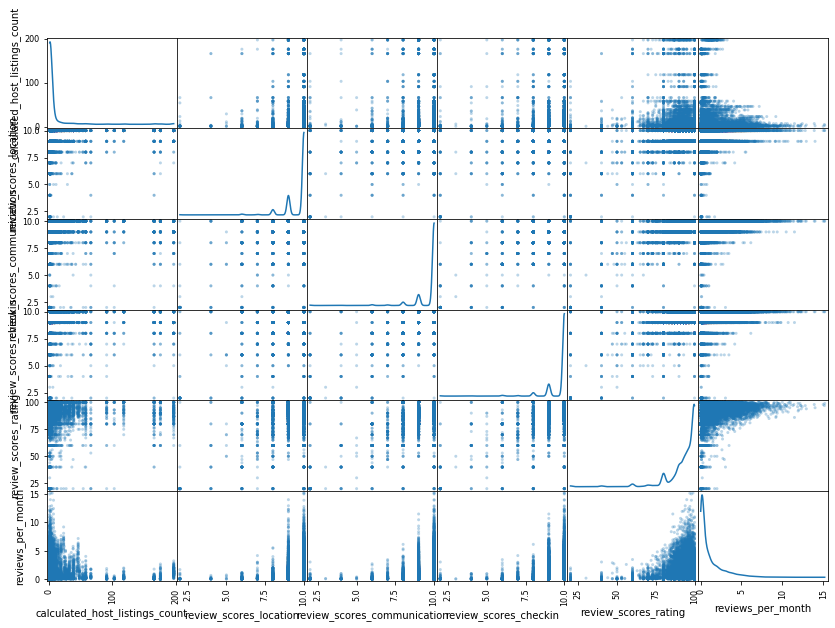

In [117]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

In [118]:
log_data = np.log(df)
log_samples = np.log(samples)

In [119]:
from IPython.display import display
display(samples)
display(log_samples)

calculated_host_listings_count  review_scores_location  \
0                               2                    10.0   
1                               1                    10.0   
2                               1                    10.0   
3                               1                    10.0   

   review_scores_communication  review_scores_checkin  review_scores_rating  \
0                         10.0                   10.0                  95.0   
1                         10.0                   10.0                  95.0   
2                         10.0                   10.0                  95.0   
3                         10.0                   10.0                 100.0   

   reviews_per_month  
0               4.83  
1               3.69  
2               0.17  
3               1.00

calculated_host_listings_count  review_scores_location  \
0                        0.693147                2.302585   
1                        0.000000                2.302585   
2                        0.000000                2.302585   
3                        0.000000                2.302585   

   review_scores_communication  review_scores_checkin  review_scores_rating  \
0                     2.302585               2.302585              4.553877   
1                     2.302585               2.302585              4.553877   
2                     2.302585               2.302585              4.553877   
3                     2.302585               2.302585              4.605170   

   reviews_per_month  
0           1.574846  
1           1.305626  
2          -1.771957  
3           0.000000

In [120]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

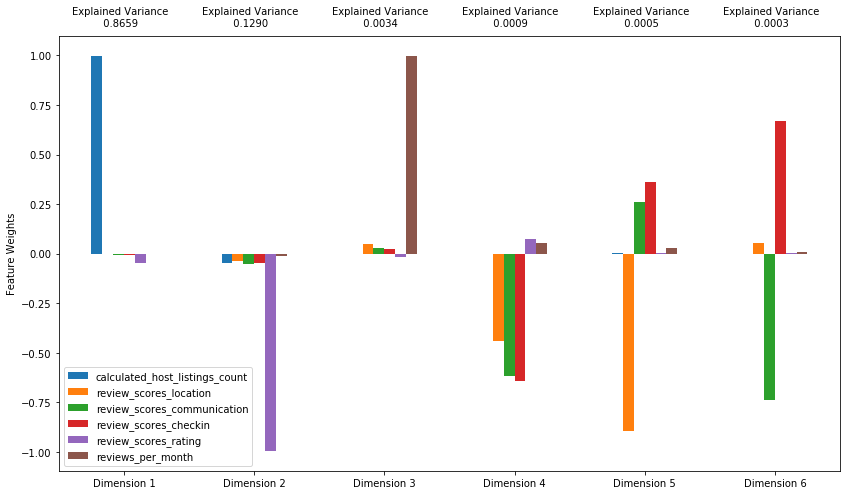

In [121]:

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=df.shape[1])
pca.fit(df)
pca_samples = pca.transform(log_samples)
# Generate PCA results plot
pca_results = pca_results(df, pca)

# print pca_results['Explained Variance'].cumsum()

In [122]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.1495      89.8124       1.1392       5.9510       1.7884   
1      -2.8416      89.8483       0.8700       5.9381       1.7795   
2      -2.8380      89.8857      -2.2016       5.7694       1.6977   
3      -2.8425      89.8131      -0.4339       5.8704       1.7449   

   Dimension 6  
0      -0.3589  
1      -0.3604  
2      -0.3785  
3      -0.3679

In [123]:

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(df)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(df)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.1495      89.8124
1      -2.8416      89.8483
2      -2.8380      89.8857
3      -2.8425      89.8131

In [124]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute
    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

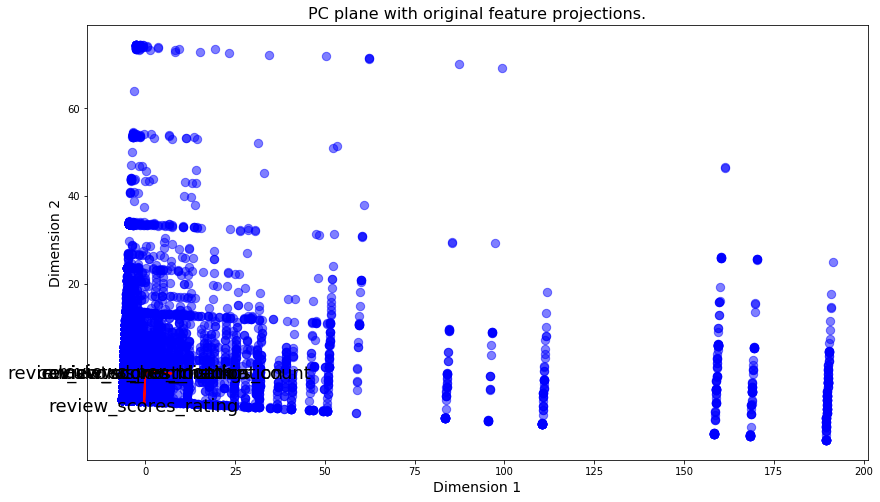

In [125]:
# Create a biplot
biplot(df, reduced_data, pca)

In [126]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
components = np.arange(2,10)
from sklearn import mixture
max_silhouette_score = 0
chosen_num_components = 0
for num_components in components:
    clusterer = mixture.GaussianMixture(n_components=num_components,random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)


    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)
    print ("The silhouette score for {} clusters is {}.".format(num_components, score))
    if max_silhouette_score < score:
        max_silhouette_score = score
        chosen_num_components = num_components

if (chosen_num_components != components[-1]):
    clusterer = mixture.GaussianMixture(n_components=chosen_num_components,random_state=42).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    score = max_silhouette_score

The silhouette score for 2 clusters is 0.5635721839389506.
The silhouette score for 3 clusters is 0.3743008781181579.
The silhouette score for 4 clusters is 0.15628295602928668.
The silhouette score for 5 clusters is 0.06097943024525946.
The silhouette score for 6 clusters is -0.058403296513864916.
The silhouette score for 7 clusters is -0.027360220475668457.
The silhouette score for 8 clusters is 0.08377170959516549.
The silhouette score for 9 clusters is -0.06968848186176192.


In [127]:
def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = plt.cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

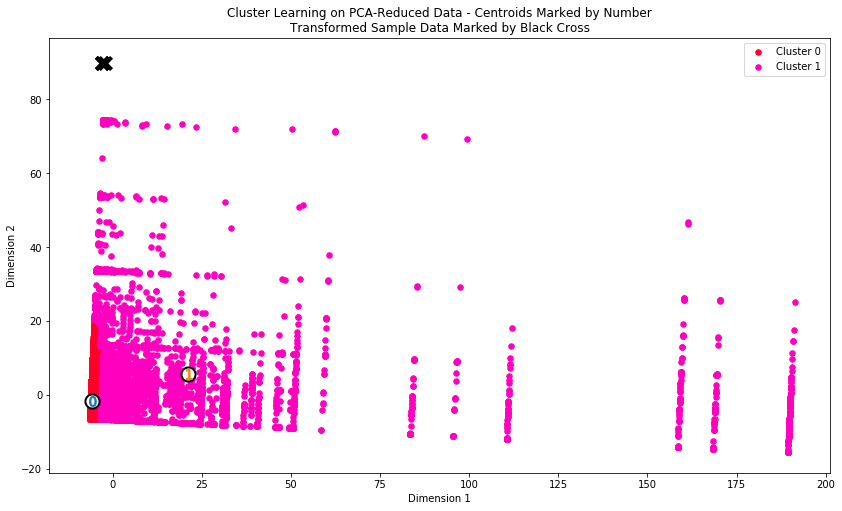

In [128]:
# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)

In [129]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())
true_centers.index = segments
display(true_centers)
print("===============mean================")
print (np.mean(df) )
print("===============max====================")
print(np.max(df))
print("===============max====================")
print(np.min(df))
print("===============max====================")
print(np.median(df,axis=0))

calculated_host_listings_count  review_scores_location  \
Segment 0                    4.000000e+00                 16775.0   
Segment 1                    1.282486e+12                 12652.0   

           review_scores_communication  review_scores_checkin  \
Segment 0                      18924.0                18647.0   
Segment 1                      11414.0                11714.0   

           review_scores_rating  reviews_per_month  
Segment 0          2.556141e+41                3.0  
Segment 1          4.402521e+37                3.0

===============mean================
calculated_host_listings_count     7.073207
review_scores_location             9.666519
review_scores_communication        9.738577
review_scores_checkin              9.732649
review_scores_rating              93.465741
reviews_per_month                  1.157051
dtype: float64
===============max====================
calculated_host_listings_count    197.00
review_scores_location             10.00
review_scores_communication        10.00
review_scores_checkin              10.00
review_scores_rating              100.00
reviews_per_month                  15.18
dtype: float64
===============max====================
calculated_host_listings_count     1.00
review_scores_location             2.00
review_scores_communication        2.00
review_scores_checkin              2.00
review_scores_rating              20.00
reviews_per_month                  0.01
dtype: float64
===============max====================
[ 1.   10.   10.   10.   96.    0.49]


In [130]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 1
